<link rel="stylesheet" href="https://use.typekit.net/dvn1law.css">
<style>        
@font-face {
font-family:"futura-pt-bold";
src:url("https://use.typekit.net/af/053fc9/00000000000000003b9af1e4/27/l?primer=7cdcb44be4a7db8877ffa5c0007b8dd865b3bbc383831fe2ea177f62257a9191&fvd=n7&v=3") format("woff2"),url("https://use.typekit.net/af/053fc9/00000000000000003b9af1e4/27/d?primer=7cdcb44be4a7db8877ffa5c0007b8dd865b3bbc383831fe2ea177f62257a9191&fvd=n7&v=3") format("woff"),url("https://use.typekit.net/af/053fc9/00000000000000003b9af1e4/27/a?primer=7cdcb44be4a7db8877ffa5c0007b8dd865b3bbc383831fe2ea177f62257a9191&fvd=n7&v=3") format("opentype");
font-display:auto;font-style:normal;font-weight:700;font-stretch:normal;
}
</style>
<div style="display: flex; margin: 0px; padding-top: 1.5rem; padding-bottom: 1.5rem; font-family: futura-pt, 'Tahoma', 'Segoe UI', Geneva, Verdana, sans-serif;">
    <span style="margin-right: 15px; padding-right: 2rem; background-color: #3b6d48;"></span>
    <div style="margin-bottom: auto; margin-top: auto; margin-right: auto; padding-right: 15px;">
        <div style="margin: 0; padding-top: 0.2rem; padding-bottom: 3.3rem; letter-spacing: 0.15rem; color: #a6ce37; font-weight: bold; font-size: 3rem; font: futura-pt-bold"> CEOS Analytics Lab</div>
        <div style="margin: 0; color: #469ab9; font-weight: bold; font-size: 1.5rem;">Welcome to the CEOS Analytics Lab!</div>
        <div style="margin: 0; padding-bottom: 0.2rem; color: #474c38; font-size: 1.25rem;"><span>TBD</span><span>| </span><span style="color: #3b6d48; font-weight: bold;">NDBI Index</span></div>
        <hr style="border: 1px solid #474c38;">
    </div>
    <div style="margin-top: auto; margin-bottom: auto; margin-left: auto; padding-left: 15px;">
        <div><img style="vertical-align: middle; padding: 0.5rem; width: 300px; height: auto;" src="https://ceos.org/document_management/Communications/CEOS-Logos/CEOS_logo_colour_no_text-small.png" /></div>
    </div>
</div>

In [7]:
import sys, os
sys.path.append(os.path.expanduser('../../../../scripts'))
from easi_tools import notebook_utils
from datacube.utils.aws import configure_s3_access
cluster, client = notebook_utils.initialize_dask(use_gateway=False)
os.environ['USE_PYGEOS'] = '0'
configure_s3_access(aws_unsigned=False, requester_pays=True, client=client)
from easi_tools import EasiDefaults
# from easi_tools import notebook_utils

/home/jovyan/cal-notebooks/examples/ceos-notebooks/Spectral Products/spectral/../../../../scripts/easi_tools/notebook_utils.py:13: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


/env/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 38907 instead
  warnings.warn(


The NDBI (Normalized Difference Built-Up Index) is a spectral index used in remote sensing to identify and analyze built-up areas in satellite imagery. It compares the reflectance values of the Short-Wave Infrared (SWIR) and Near-Infrared (NIR) bands to highlight urban features. Positive NDBI values indicate built-up areas, while negative values represent natural features. The NDBI is used for urban growth analysis, land cover mapping, urban heat island studies, and disaster assessment. It helps in understanding urbanization patterns, managing land resources, studying climate effects, and assessing post-disaster damage.


### Formula
```
(SWIR1 - NIR) / (NIR + R)
```
  

### The NDBI has various applications across different fields:

The NDBI is utilized in various applications related to urban planning, land cover mapping, and environmental monitoring. Some common uses of the NDBI include:

- Urban Growth Analysis: By analyzing historical NDBI values over time, changes in built-up areas can be identified and quantified. This information is valuable for assessing urban growth patterns, monitoring urban expansion, and managing infrastructure development.

- Land Use and Land Cover Mapping: The NDBI can help distinguish between built-up areas, vegetation, water bodies, and bare soil. By combining the NDBI with other spectral indices and classification techniques, accurate land cover maps can be generated, aiding in land management and resource planning.

- Urban Heat Island Studies: The NDBI is often employed in studies related to the urban heat island effect. It helps identify areas with high building density and heat-absorbing surfaces, providing valuable insights for urban climate studies and strategies to mitigate heat island effects.

- Disaster Assessment and Monitoring: After natural disasters such as earthquakes or floods, the NDBI can assist in rapid damage assessment and recovery monitoring. By comparing pre- and post-event NDBI values, affected built-up areas can be identified and analyzed for damage estimation.






  

### Definition

In [8]:
def NDBI(spectral_dataset):
    """
    The Normalized Difference Built-up Index (NDBI) monitors urbanization.
    Greater values generally indicate more urbanization.
    The range is [-1,1].
    """
    return (spectral_dataset.swir1 - spectral_dataset.nir)/(spectral_dataset.swir1 + spectral_dataset.nir)

# Invocation of the Index

#### Load Data

In [41]:
import datacube
dc = datacube.Datacube(app = "NDBI")

landsat_dataset = dc.load(latitude =(37.02, 37.12) ,
                          longitude =  (-76.55, -76.34) ,
                          time = ('2015-1-1', '2015-12-31'),
                          product = "landsat8_c2l2_sr",
                          measurements = ['red', 'green', 'blue', 'nir', 'swir1', 'pixel_qa'],
                          output_crs = 'EPSG:6933',
                          resolution = (-30,30),
                        dask_chunks = {'time':1}
                         ) 

#### Create Composite

In [16]:
def median_composite(dataset, clean_mask):
    cleaned_dataset = dataset.where(clean_mask)
    composite = cleaned_dataset.median('time', skipna=True)
    return composite

In [17]:
from landsat_utils import landsat_qa_clean_mask

cloud_mask             = landsat_qa_clean_mask(landsat_dataset,
                                               platform="LANDSAT_8", 
                                               collection="c2",
                                               level="l2")

land_mask =  landsat_qa_clean_mask(landsat_dataset,
                                                platform="LANDSAT_8", 
                                                collection="c2",
                                                level="l2",
                                                cover_types=['clear'])

land_and_water_dataset = landsat_dataset.where(cloud_mask)
land_dataset = landsat_dataset.where(land_mask)

land_and_water_composite =   median_composite(land_and_water_dataset, cloud_mask).persist()
land_composite = median_composite(land_dataset, land_mask).persist()



### Plot Composite

In [18]:
import numpy as np
rgb_arr = np.dstack([land_and_water_composite.red.values,land_and_water_composite.green.values,land_and_water_composite.blue.values])

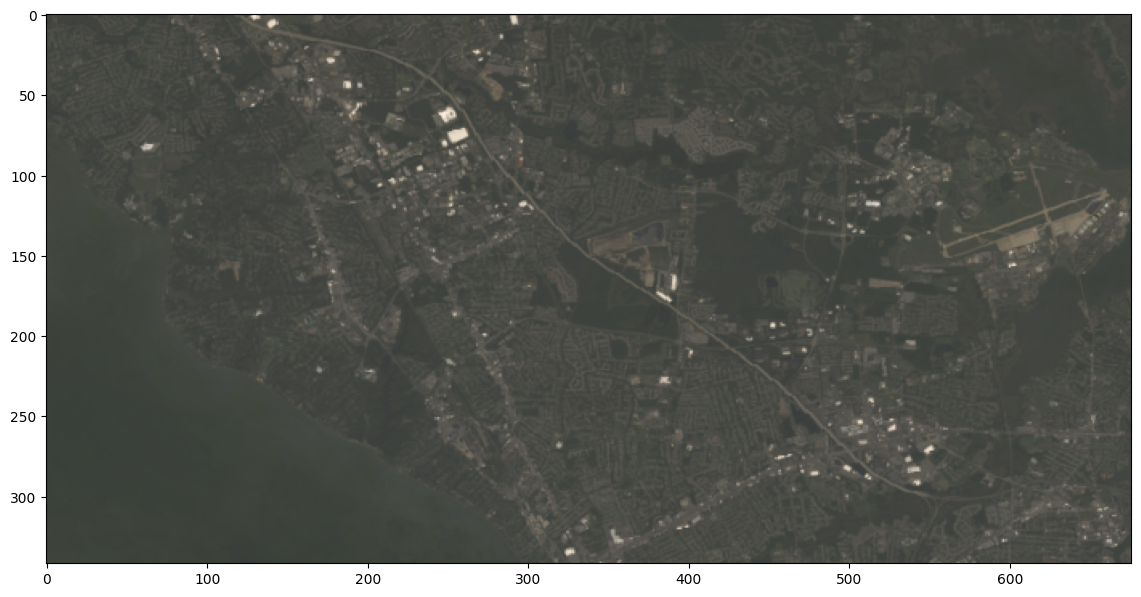

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 8))
plt.imshow(rgb_arr/rgb_arr.max())

### Run NDBI on Composite

In [20]:
ds_NDBI = NDBI(land_and_water_composite)

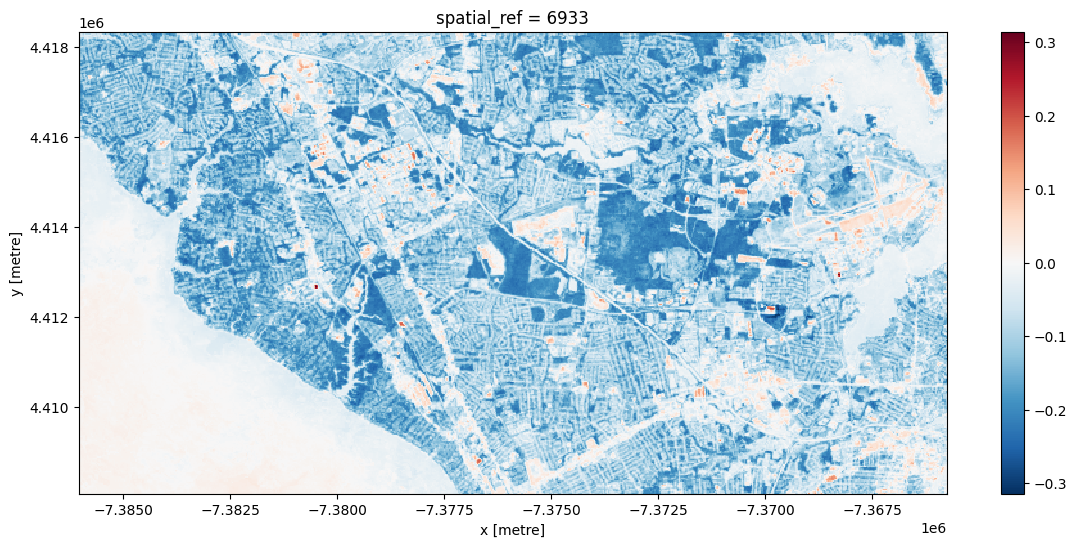

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 6))
ds_NDBI.plot.imshow()

The NDBI values typically range from -1 to 1, with different thresholds used to classify land cover types.  

- Positive NDBI values indicate the presence of built-up areas
- negative values correspond to non-built or natural features like vegetation, water bodies, or bare soil
- a threshold value of 0 is often used to differentiate between built-up and non-built-up areas.

